In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("june_exams.csv")
results = df[df["Name"] != "Total"].set_index("Name").drop(columns="Class")
total = df[df["Name"] == "Total"].set_index("Name").drop(columns="Class").iloc[0]
norm = results.div(total, axis="columns").round(2)

#melting df for further analysis
norm_table = df[df["Name"] != "Total"][['Name','Class']].reset_index(drop=True)
norm_table = pd.concat([norm_table, norm.reset_index(drop=True)],axis=1)
melt = norm_table.melt(id_vars=['Name','Class'],var_name='Exam', value_name='Mark')[["Name", "Class","Exam","Mark"]]

# Visulisation of the Entire Dataset

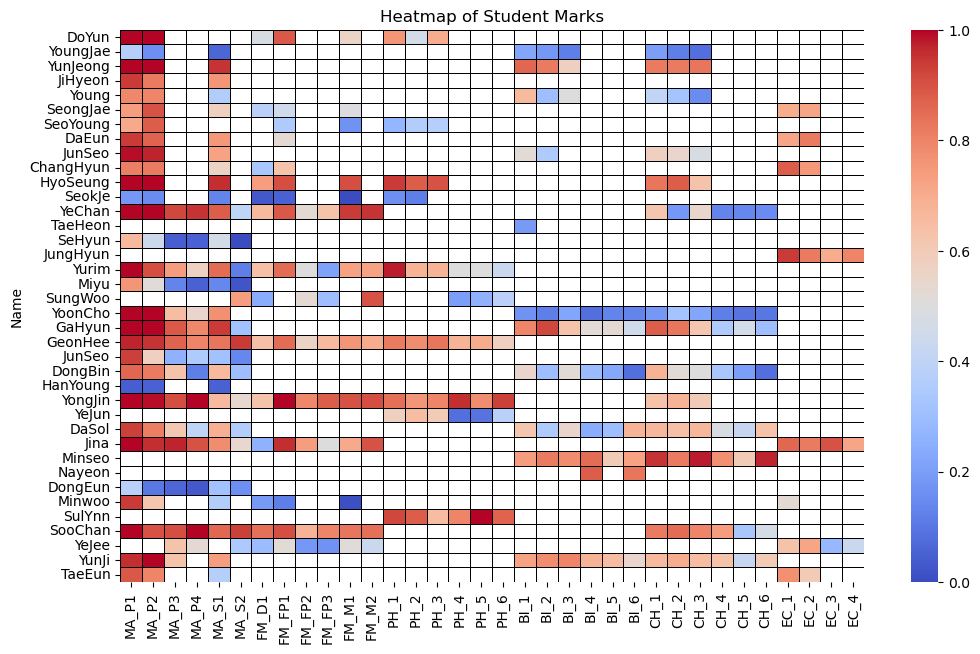

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=norm,
    #annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Student Marks")
plt.show()

# Breakdown by Subject

## Maths

In [40]:
maths = melt[melt['Exam'].str.contains('MA')]
maths_table = norm[[col for col in norm.columns if 'MA' in col]].dropna(how='all')

In [41]:
print(maths_table.mean())

MA_P1    0.826333
MA_P2    0.760333
MA_P3    0.615625
MA_P4    0.539333
MA_S1    0.589286
MA_S2    0.389333
dtype: float64


Text(0.5, 1.0, 'Maths Results')

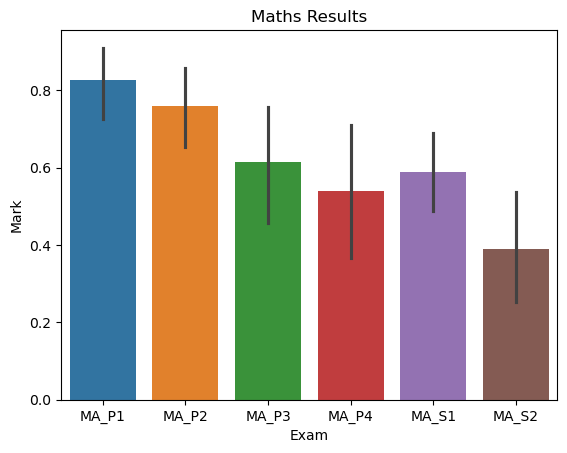

In [42]:
sns.barplot(maths,x='Exam',y='Mark',hue='Exam')
plt.title('Maths Results')

Text(0.5, 1.0, 'Heatmap of Maths Marks')

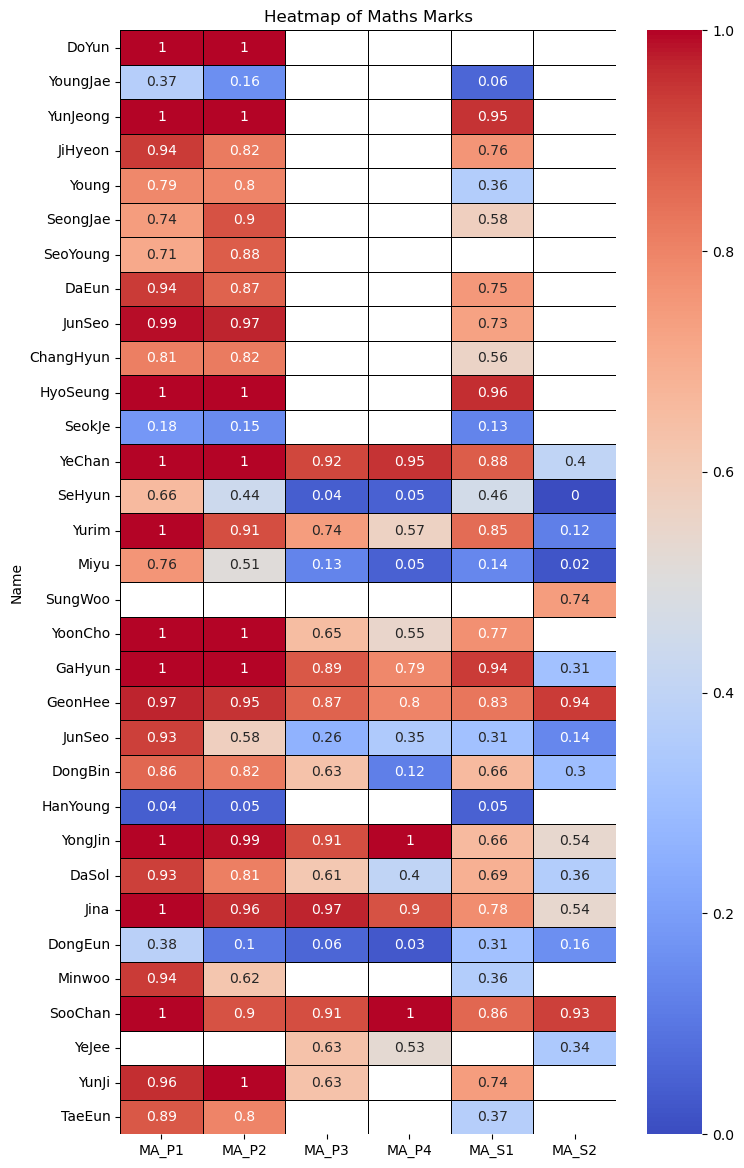

In [43]:
plt.figure(figsize=(8, 16))
sns.heatmap(
    data=maths_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Maths Marks")

## Further Maths

In [44]:
fm = melt[melt['Exam'].str.contains('FM')]
fm_table = norm[[col for col in norm.columns if 'FM' in col]].dropna(how='all')

In [45]:
print(fm_table.mean())

FM_D1     0.453571
FM_FP1    0.660667
FM_FP2    0.563750
FM_FP3    0.518750
FM_M1     0.578462
FM_M2     0.795000
dtype: float64


Text(0.5, 1.0, 'Further Maths Results')

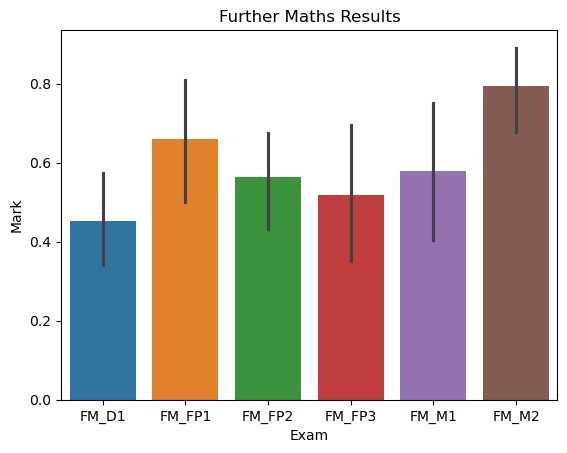

In [46]:
sns.barplot(fm,x='Exam',y='Mark',hue='Exam')
plt.title('Further Maths Results')

Text(0.5, 1.0, 'Heatmap of Further Maths Marks')

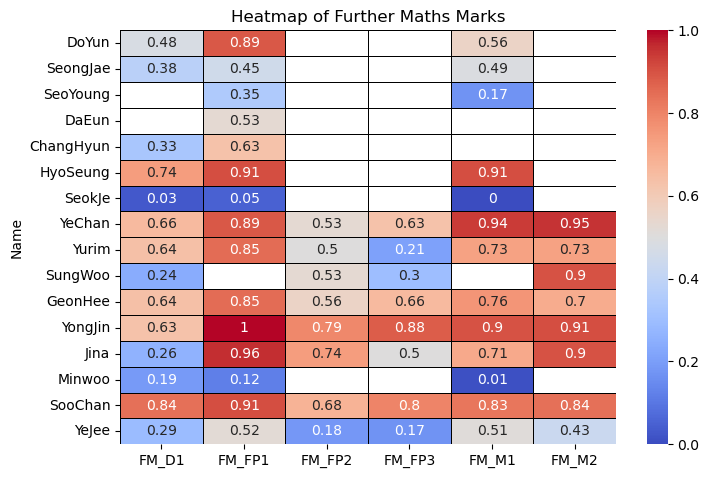

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=fm_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Further Maths Marks")

## Physics

In [48]:
physics = melt[melt['Exam'].str.contains('PH')]
physics_table = norm[[col for col in norm.columns if 'PH' in col]].dropna(how='all')

In [49]:
print(physics_table.mean())

PH_1    0.696667
PH_2    0.618889
PH_3    0.691250
PH_4    0.536667
PH_5    0.555000
PH_6    0.595000
dtype: float64


Text(0.5, 1.0, 'Physics Results')

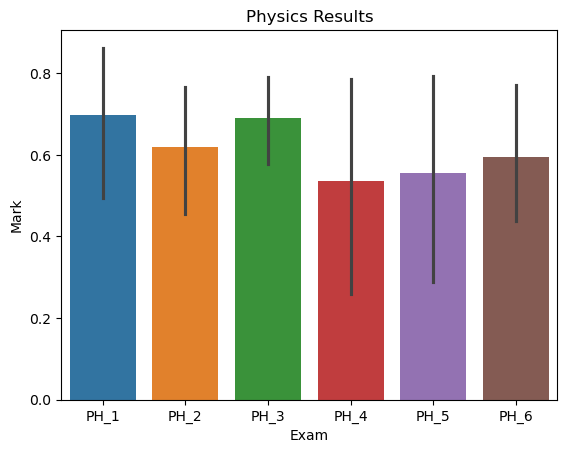

In [50]:
sns.barplot(physics,x='Exam',y='Mark',hue='Exam')
plt.title('Physics Results')

Text(0.5, 1.0, 'Heatmap of Physics Marks')

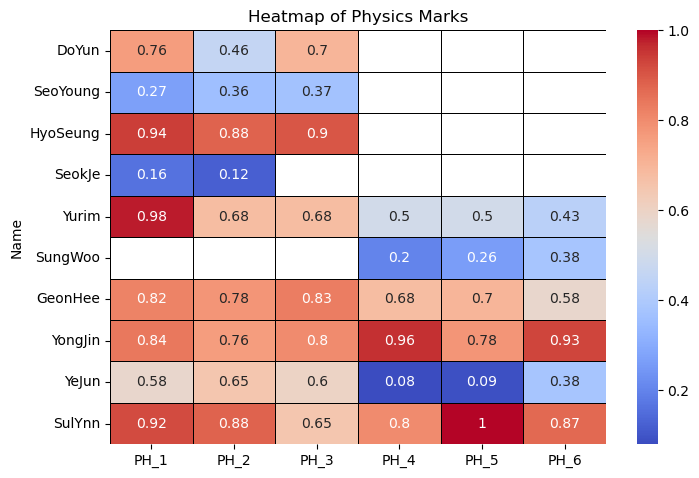

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=physics_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Physics Marks")

## Chemistry

In [52]:
chemistry = melt[melt['Exam'].str.contains('CH')]
chemistry_table = norm[[col for col in norm.columns if 'CH' in col]].dropna(how='all')

In [53]:
print(chemistry_table.mean())

CH_1    0.637143
CH_2    0.587857
CH_3    0.554286
CH_4    0.443750
CH_5    0.332500
CH_6    0.412500
dtype: float64


Text(0.5, 1.0, 'Chemistry Results')

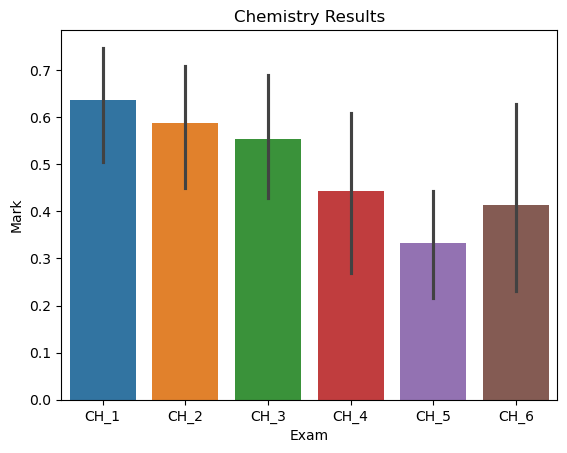

In [54]:
sns.barplot(chemistry,x='Exam',y='Mark',hue='Exam')
plt.title('Chemistry Results')

Text(0.5, 1.0, 'Heatmap of Chemistry Marks')

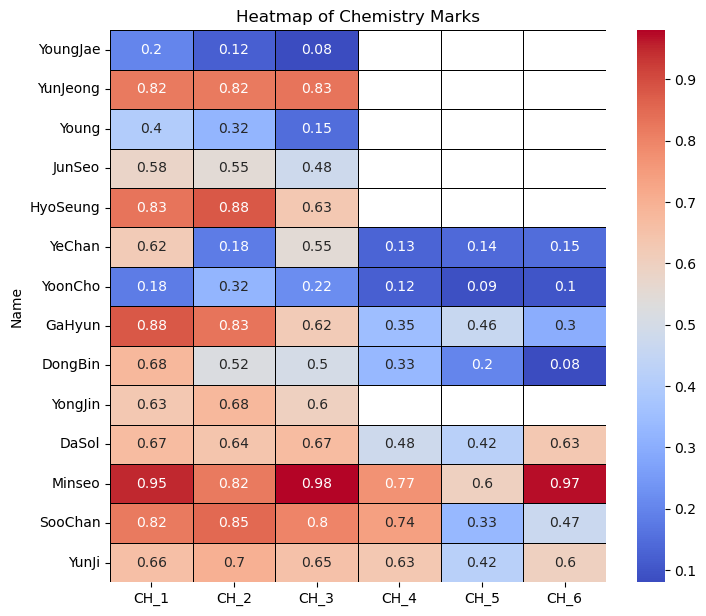

In [55]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    data=chemistry_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Chemistry Marks")

## Biology

In [56]:
biology = melt[melt['Exam'].str.contains('BI')]
biology_table = norm[[col for col in norm.columns if 'BI' in col]].dropna(how='all')

In [57]:
print(biology_table.mean())

BI_1    0.550909
BI_2    0.494000
BI_3    0.522222
BI_4    0.505714
BI_5    0.406667
BI_6    0.492857
dtype: float64


Text(0.5, 1.0, 'Biology Results')

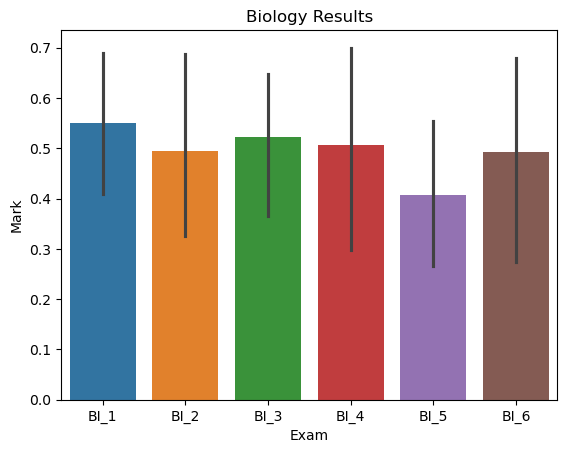

In [58]:
sns.barplot(biology,x='Exam',y='Mark',hue='Exam')
plt.title('Biology Results')

Text(0.5, 1.0, 'Heatmap of Biology Marks')

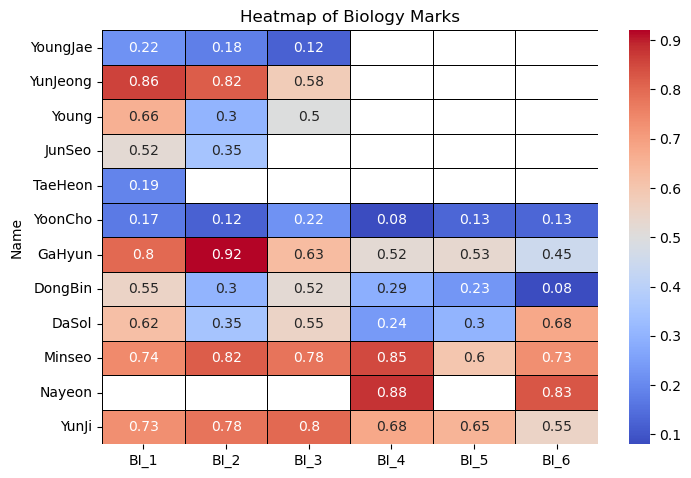

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=biology_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Biology Marks")

## Economics

In [6]:
econ = melt[melt['Exam'].str.contains('EC')]
econ_table = norm[[col for col in norm.columns if 'EC' in col]].dropna(how='all')

In [61]:
print(econ_table.mean())

EC_1    0.753750
EC_2    0.750000
EC_3    0.626667
EC_4    0.650000
dtype: float64


Text(0.5, 1.0, 'Economics Results')

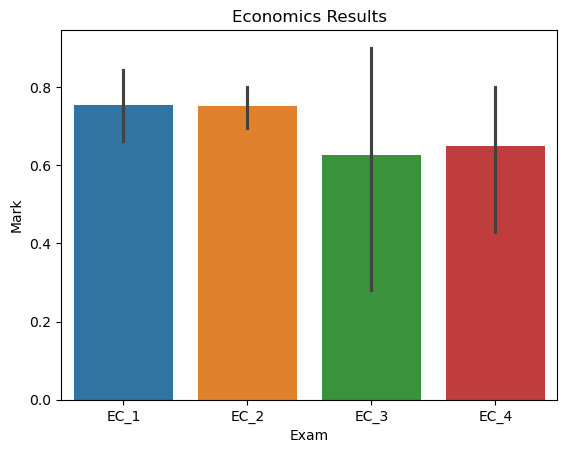

In [62]:
sns.barplot(econ,x='Exam',y='Mark',hue='Exam')
plt.title('Economics Results')

Text(0.5, 1.0, 'Heatmap of Economics Marks')

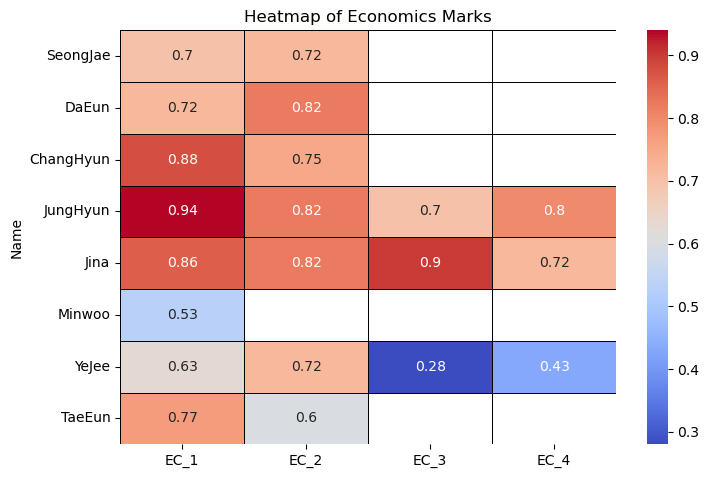

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=econ_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Economics Marks")

# Filtering by Cohort

In [4]:
# listing the cohorts
print(norm_table['Class'].unique())

['2024_w' 'online' '2023_w' '2023_s' nan '2021_w' '2022_s' '2022_w']


## Filtering for the 2024 Winter Cohort

In [29]:
w24_table = norm_table[norm_table['Class']=='2024_w'].drop(columns='Class').set_index('Name').dropna(axis=1,how='all')
w24 = melt[melt['Class']=='2024_w'].drop(columns='Class').set_index('Name').dropna()

In [22]:
print(w24_table.mean(numeric_only=True))

MA_P1     0.796923
MA_P2     0.766923
MA_S1     0.528182
FM_D1     0.358333
FM_FP1    0.491250
FM_M1     0.356667
PH_1      0.532500
PH_2      0.455000
PH_3      0.656667
BI_1      0.565000
BI_2      0.412500
BI_3      0.400000
CH_1      0.566000
CH_2      0.538000
CH_3      0.434000
EC_1      0.720000
EC_2      0.722500
dtype: float64


Text(0.5, 1.0, 'Heatmap of the 2024 Winter Cohort')

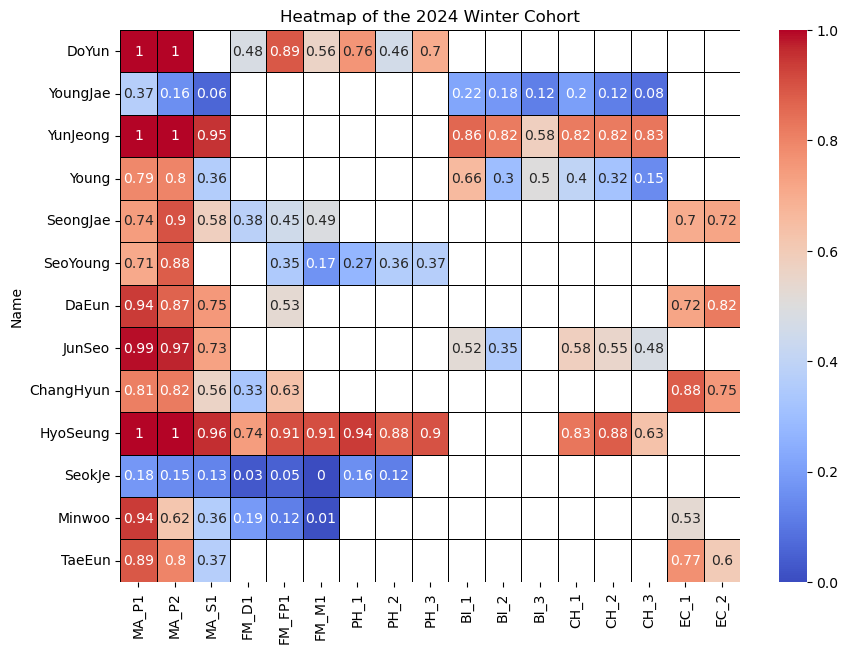

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=w24_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of the 2024 Winter Cohort")

Text(0.5, 1.0, 'Winter 2024 Cohort Results')

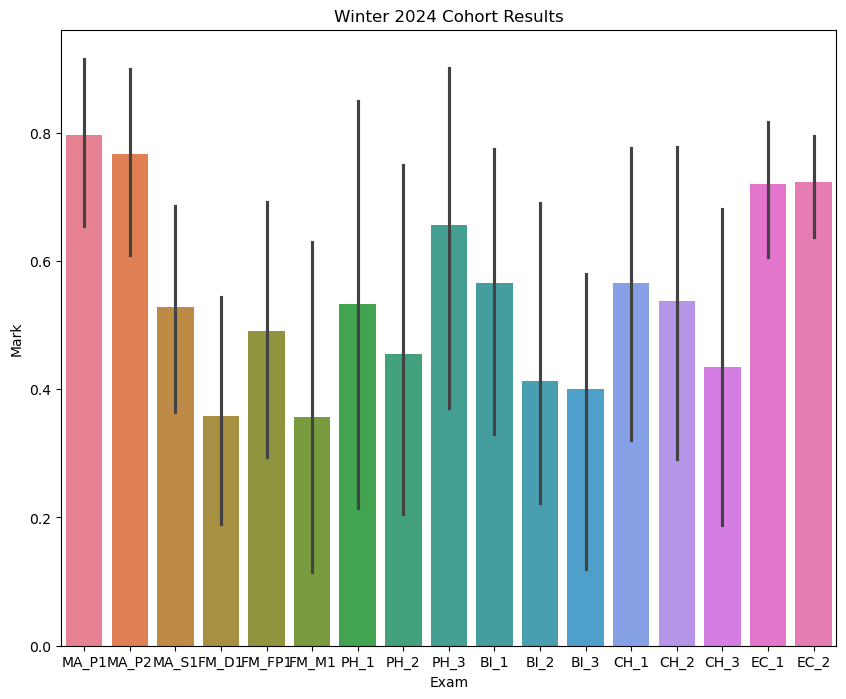

In [34]:
plt.figure(figsize=(10, 8))
sns.barplot(w24.reset_index(drop=False),x='Exam',y='Mark',hue='Exam')
plt.title('Winter 2024 Cohort Results')

## 2023 Summer Cohort

In [47]:
s23_table = norm_table[norm_table['Class']=='2023_s'].drop(columns='Class').set_index('Name').dropna(axis=1,how='all')
s23 = melt[melt['Class']=='2023_s'].drop(columns='Class').set_index('Name').dropna()

In [48]:
print(s23_table.mean(numeric_only=True))

MA_P1    0.621667
MA_P2    0.485000
MA_P3    0.294000
MA_P4    0.132500
MA_S1    0.398333
MA_S2    0.135000
BI_1     0.513333
BI_2     0.565000
BI_3     0.675000
BI_4     0.460000
BI_5     0.475000
BI_6     0.615000
CH_1     0.665000
CH_2     0.670000
CH_3     0.660000
CH_4     0.555000
CH_5     0.420000
CH_6     0.615000
dtype: float64


Text(0.5, 1.0, 'Heatmap of the 2023 Summer Cohort')

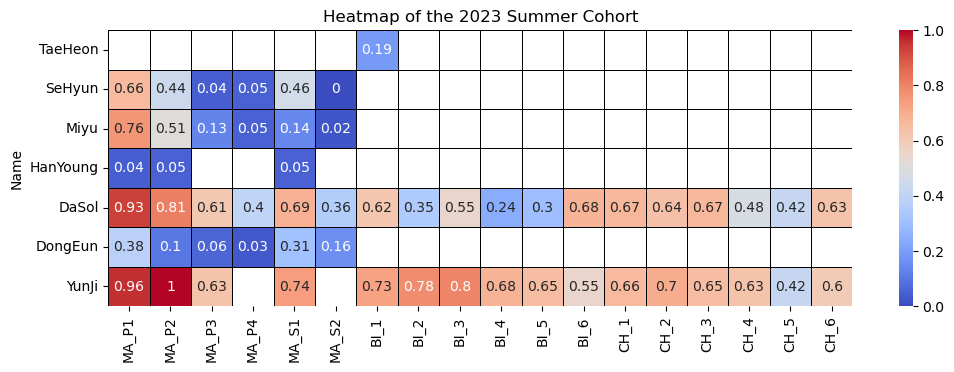

In [51]:
plt.figure(figsize=(12, 4))
sns.heatmap(
    data=s23_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of the 2023 Summer Cohort")

Text(0.5, 1.0, 'Summer 2022 Cohort Results')

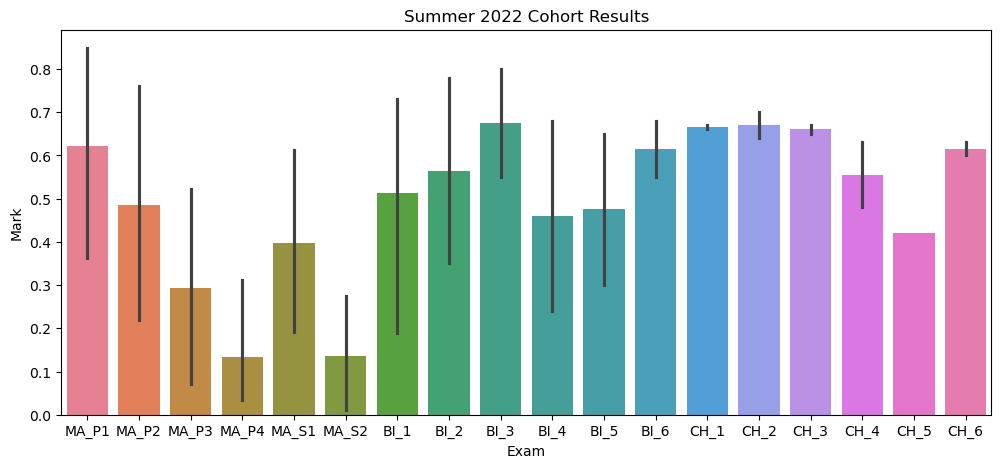

In [57]:
plt.figure(figsize=(12, 5))
sns.barplot(s23.reset_index(drop=False),x='Exam',y='Mark',hue='Exam')
plt.title('Summer 2022 Cohort Results')

## 2022 Summer Cohort

In [32]:
s22_table = norm_table[norm_table['Class']=='2022_s'].drop(columns='Class').set_index('Name').dropna(axis=1,how='all')
s22 = melt[melt['Class']=='2022_s'].drop(columns='Class').set_index('Name').dropna()

In [42]:
print(s22_table.mean(numeric_only=True))

MA_P1     0.953333
MA_P2     0.923333
MA_P3     0.836667
MA_P4     0.673333
MA_S1     0.700000
MA_S2     0.530000
FM_D1     0.376667
FM_FP1    0.980000
FM_FP2    0.686667
FM_FP3    0.560000
FM_M1     0.805000
FM_M2     0.903333
PH_1      0.840000
PH_2      0.760000
PH_3      0.800000
PH_4      0.580000
PH_5      0.520000
PH_6      0.655000
BI_1      0.550000
BI_2      0.300000
BI_3      0.520000
BI_4      0.290000
BI_5      0.230000
BI_6      0.080000
CH_1      0.655000
CH_2      0.600000
CH_3      0.550000
CH_4      0.330000
CH_5      0.200000
CH_6      0.080000
EC_1      0.860000
EC_2      0.820000
EC_3      0.900000
EC_4      0.720000
dtype: float64


Text(0.5, 1.0, 'Heatmap of the 2022 Summer Cohort')

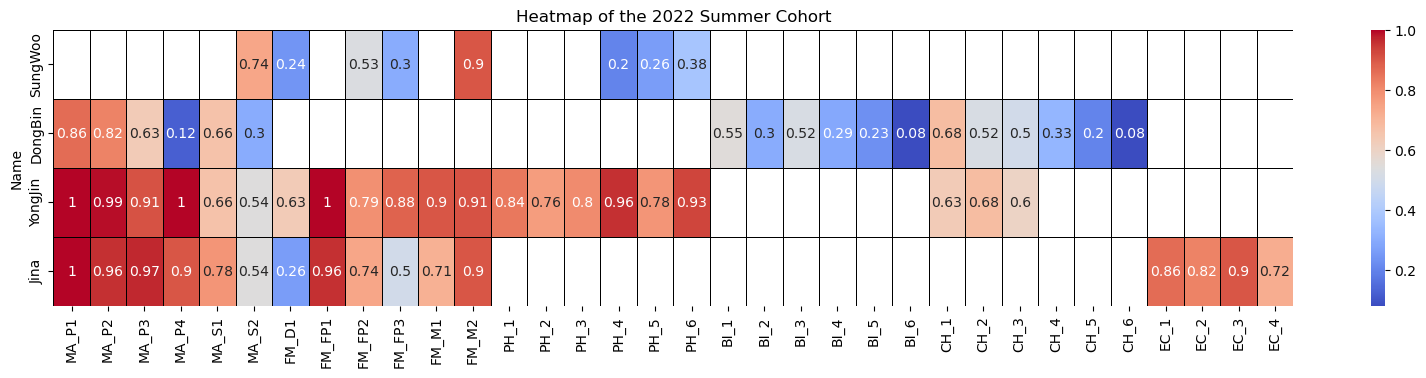

In [53]:
plt.figure(figsize=(20, 4))
sns.heatmap(
    data=s22_table,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of the 2022 Summer Cohort")

Text(0.5, 1.0, 'Summer 2022 Cohort Results')

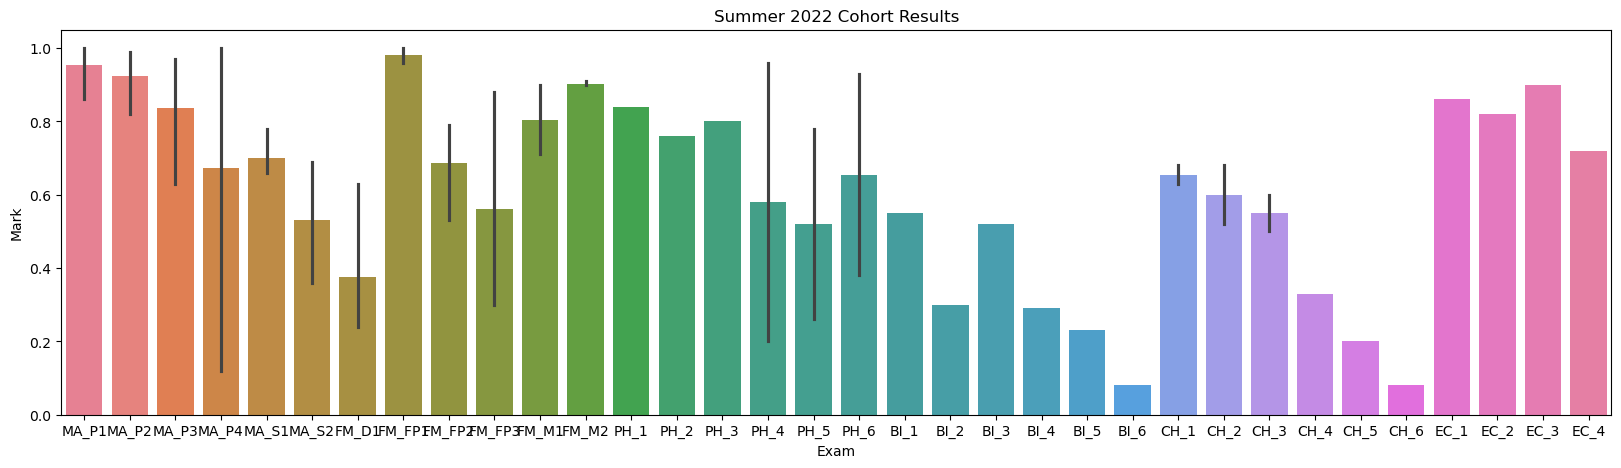

In [46]:
plt.figure(figsize=(20, 5))
sns.barplot(s22.reset_index(drop=False),x='Exam',y='Mark',hue='Exam')
plt.title('Summer 2022 Cohort Results')

# Comparing Individual Students

In [68]:
HyoSeung = melt[melt['Name']=='HyoSeung']
YongJin = melt[melt['Name']=='YongJin']
compare = pd.concat([HyoSeung,YongJin],ignore_index=True).dropna()

<Axes: xlabel='Exam', ylabel='Mark'>

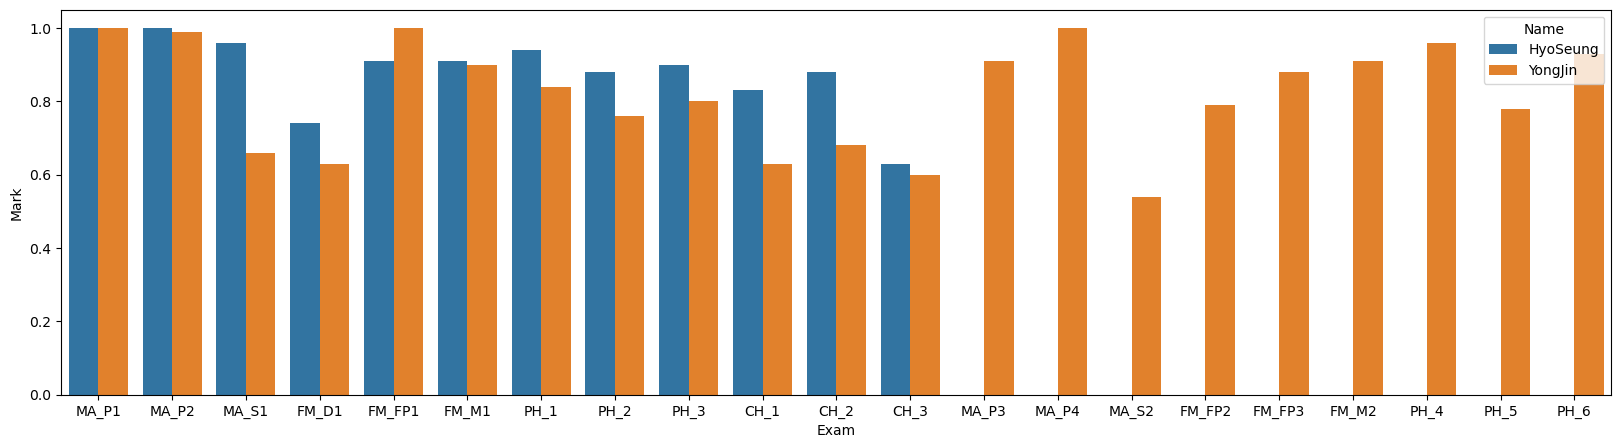

In [70]:
plt.figure(figsize=(20, 5))
sns.barplot(compare,x='Exam',y='Mark',hue='Name')

## Comparing Cohorts

In [78]:
data = norm_table.drop(columns='Name')
mean_df = data.groupby('Class').mean(numeric_only=True).reset_index()

Text(0.5, 1.0, 'Average Marks per Cohort')

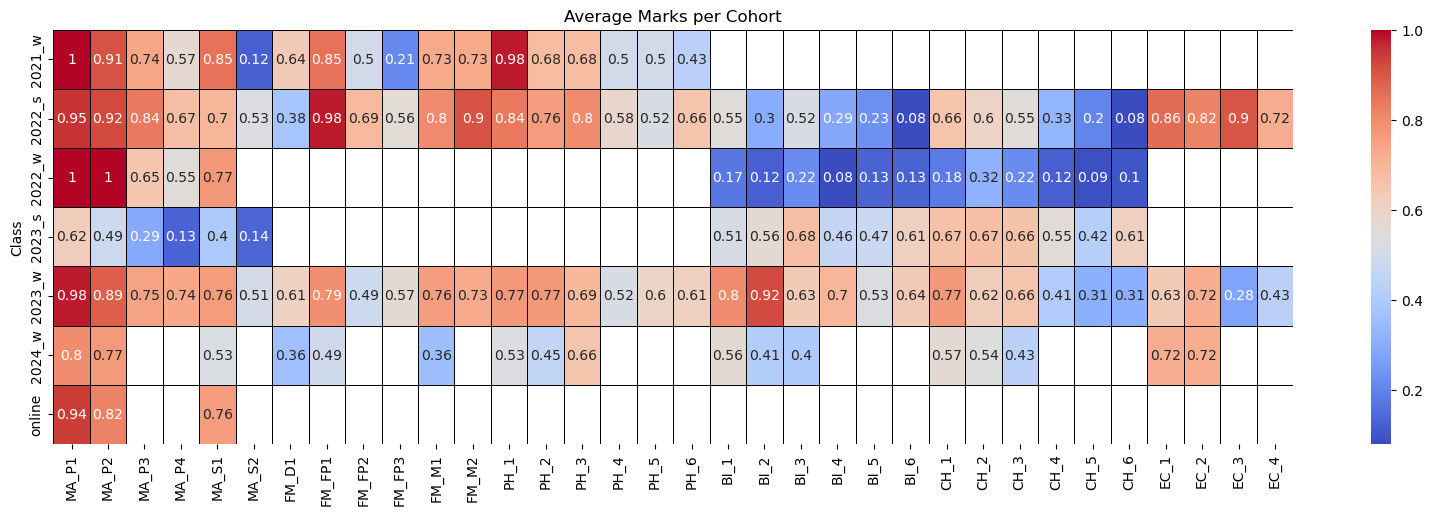

In [83]:
plt.figure(figsize=(20, 6))
sns.heatmap(
    data=mean_df.set_index('Class'),
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Average Marks per Cohort")